In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('Churn_Modelling.csv')
print(df.shape)
for col in df:
    print(col,df[col].unique())
    

(10000, 14)
RowNumber [    1     2     3 ...  9998  9999 10000]
CustomerId [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 8

In [26]:
df1=df.drop(['RowNumber','CustomerId','Surname'],axis='columns')
print(df1.shape)
def prnt_un(df):
    """Prints the unique values for every column in the DataFrame, 
    excluding 'CreditScore'."""
    print("--- Unique Values per Column ---")
    for col in df.columns:
        # Get all unique values for the column
        unique_vals = df[col].unique()
        # If there are too many unique values (e.g., for numeric columns), 
        # we'll just print the count and min/max to keep the output clean.
        if len(unique_vals) > 10:
            print(f"{col:<20} : {len(unique_vals)} unique values (Min: {df[col].min():.2f}, Max: {df[col].max():.2f})")
        else:
            print(f"{col:<20} : {unique_vals}")           
prnt_un(df1)

(10000, 11)
--- Unique Values per Column ---
CreditScore          : 460 unique values (Min: 350.00, Max: 850.00)
Geography            : ['France' 'Spain' 'Germany']
Gender               : ['Female' 'Male']
Age                  : 70 unique values (Min: 18.00, Max: 92.00)
Tenure               : 11 unique values (Min: 0.00, Max: 10.00)
Balance              : 6382 unique values (Min: 0.00, Max: 250898.09)
NumOfProducts        : [1 3 2 4]
HasCrCard            : [1 0]
IsActiveMember       : [1 0]
EstimatedSalary      : 9999 unique values (Min: 11.58, Max: 199992.48)
Exited               : [1 0]


In [32]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,dtype=int)
not_yes_no=['Gender','Geography','NumOfProducts']
not_yes_no_cols=[col for col in df1.columns if col in not_yes_no]
ohe_df=pd.DataFrame(ohe.fit_transform(df1[not_yes_no_cols]),columns=ohe.get_feature_names_out())
ohe_df.head()
df2=pd.concat([df1,ohe_df],axis='columns')
df2.drop(not_yes_no_cols,axis='columns',inplace=True)
df2.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,1,0,113931.57,1,1,0,0,1,0,0,0,1,0
3,699,39,1,0.00,0,0,93826.63,0,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,1,0,0,0


In [35]:
prnt_un(df2)

--- Unique Values per Column ---
CreditScore          : 460 unique values (Min: 350.00, Max: 850.00)
Age                  : 70 unique values (Min: 18.00, Max: 92.00)
Tenure               : 11 unique values (Min: 0.00, Max: 10.00)
Balance              : 6382 unique values (Min: 0.00, Max: 250898.09)
HasCrCard            : [1 0]
IsActiveMember       : [1 0]
EstimatedSalary      : 9999 unique values (Min: 11.58, Max: 199992.48)
Exited               : [1 0]
Geography_France     : [1 0]
Geography_Germany    : [0 1]
Geography_Spain      : [0 1]
Gender_Female        : [1 0]
Gender_Male          : [0 1]
NumOfProducts_1      : [1 0]
NumOfProducts_2      : [0 1]
NumOfProducts_3      : [0 1]
NumOfProducts_4      : [0 1]


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scalable_cols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
for col in scalable_cols:
    df2[col]=scaler.fit_transform(df2[[col]])
df2.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0.324324,0.2,0.000000,1,1,0.506735,1,1,0,0,1,0,1,0,0,0
1,0.516,0.310811,0.1,0.334031,0,1,0.562709,0,0,0,1,1,0,1,0,0,0
2,0.304,0.324324,0.8,0.636357,1,0,0.569654,1,1,0,0,1,0,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0,0,0.469120,0,1,0,0,1,0,0,1,0,0
4,1.000,0.337838,0.2,0.500246,1,1,0.395400,0,0,0,1,1,0,1,0,0,0


In [39]:
prnt_un(df2)
df2.shape

--- Unique Values per Column ---
CreditScore          : 460 unique values (Min: 0.00, Max: 1.00)
Age                  : 70 unique values (Min: 0.00, Max: 1.00)
Tenure               : 11 unique values (Min: 0.00, Max: 1.00)
Balance              : 6382 unique values (Min: 0.00, Max: 1.00)
HasCrCard            : [1 0]
IsActiveMember       : [1 0]
EstimatedSalary      : 9999 unique values (Min: 0.00, Max: 1.00)
Exited               : [1 0]
Geography_France     : [1 0]
Geography_Germany    : [0 1]
Geography_Spain      : [0 1]
Gender_Female        : [1 0]
Gender_Male          : [0 1]
NumOfProducts_1      : [1 0]
NumOfProducts_2      : [0 1]
NumOfProducts_3      : [0 1]
NumOfProducts_4      : [0 1]


(10000, 17)

In [41]:
from sklearn.model_selection import train_test_split
x=df2.drop('Exited',axis='columns')
y=df2['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape,x_test.shape)
len(x_test.columns)

(8000, 16) (2000, 16)


16

In [45]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(16,input_shape=(16,),activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
                metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50


/home/paal/miniconda3/envs/tf-gpu-clean/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7965 - loss: 0.4956
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.4280
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8220 - loss: 0.4027
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8388 - loss: 0.3847
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.3746
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.3698
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8466 - loss: 0.3654
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.3623
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.3597
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - loss: 0.3570
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8512 - loss: 0.3549
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


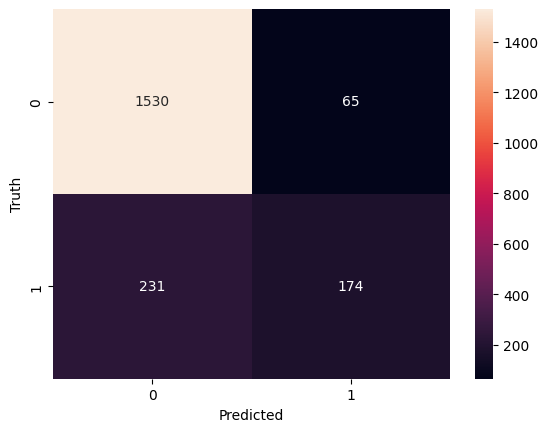

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.43      0.54       405

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [50]:
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,classification_report

y_pred=model.predict(x_test).round()
cm=confusion_matrix(y_test,y_pred)
disp=sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test,y_pred))